In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.interpolate import UnivariateSpline
from patsy import dmatrices, dmatrix, demo_data

from scipy.stats import multivariate_normal
import scipy.stats as stats

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
mpl.rcParams['axes.linewidth'] = 2

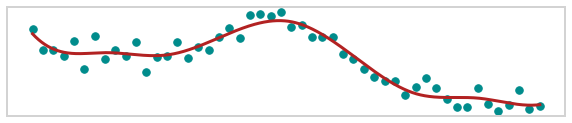

In [3]:
fig, ax = plt.subplots(figsize=(10,2))
np.random.seed(1)
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) - 0.2*x + 0.15 * np.random.randn(50)
plt.plot(x, y, '#008C8C', marker=".", ms=15, lw=0)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
#plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(1)
plt.plot(xs, spl(xs), 'firebrick', lw=3)

plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False,length=0) 
plt.tick_params(axis='y',which='both', left=False, top=False, labelleft=False,length=0)


ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')

plt.savefig('flex.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
plt.show()

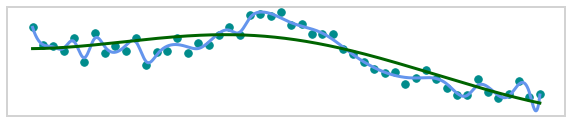

In [4]:
fig, ax = plt.subplots(figsize=(10,2))
np.random.seed(1)
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) - 0.2*x + 0.15 * np.random.randn(50)
plt.plot(x, y, '#008C8C', marker=".", ms=15, lw=0)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
#plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.3)
plt.plot(xs, spl(xs), 'cornflowerblue', lw=3)

spl.set_smoothing_factor(3)
plt.plot(xs, spl(xs), 'darkgreen', lw=3)

plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False,length=0) 
plt.tick_params(axis='y',which='both', left=False, top=False, labelleft=False,length=0)


ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')

plt.savefig('wiggly.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
plt.show()

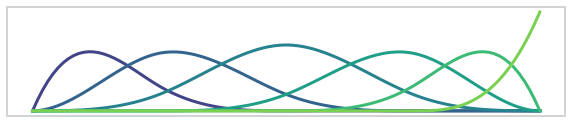

In [5]:
fig, ax = plt.subplots(figsize=(10,2))

x = np.linspace(0., 1., 100)
# Define some coefficients
b = np.array([2,2,2,2,2,2])
y = dmatrix("bs(x, df=6) - 1", {"x": x})

# Plot cyclic cubic regression spline basis functions (colored curves) each multiplied by its coeff
ax = plt.axes()
ax.set_prop_cycle('color',[plt.cm.viridis(i) for i in np.linspace(0.2, 0.8, 6)])
plt.plot(x, y*b, lw=3);

plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False,length=0) 
plt.tick_params(axis='y',which='both', left=False, top=False, labelleft=False,length=0)


ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')

# Plot the spline itself (sum of the basis functions, thick black curve)
#plt.plot(x, np.dot(y, b), color='firebrick', linewidth=4);

plt.savefig('bases.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
plt.show()

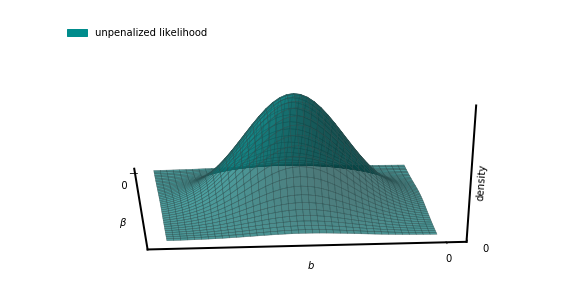

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

delta = 0.05
f = 0.5

X, Y = np.meshgrid(np.arange(0, 2, delta),
                   np.arange(-2, 0, delta))
xy = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

p = stats.multivariate_normal.pdf(xy, mean=[1, -1], cov=(np.eye(2) * 0.28 * f))
Z = p.reshape(len(X), len(X))

ax.plot_surface(X, Y, Z, color='#008C8C', alpha=0.7, linewidth=0.5, antialiased=True,  edgecolor="darkslategray")

# phantom posterior
sigma = 0.3 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='white', linewidth=3, linestyle='--')

# phantom marginal distributions
Zys = np.zeros_like(Z)
Zys[30,:] = Z.max(0)
ax.contour(X, Y, Zys, zdir='y', offset=0, colors='white', linewidths=3, linestyles='solid')



# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes
ax.xaxis.set_ticklabels(['   0\n'], linespacing=70)
ax.yaxis.set_ticklabels(['0\n\n\n\n'], linespacing=70)
ax.zaxis.set_ticklabels(['0'])
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('           $\\beta$', rotation=0)
ax.set_ylabel('$b$\n')
ax.set_zlabel('density\n', linespacing=8)

# legend
marrs_patch = mpatches.Patch(color='#008C8C', label='unpenalized likelihood')
green_line = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$')
blue_line = mlines.Line2D([], [], color='steelblue',markersize=15, label='marginal likelihood of b')
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='prior of b')
purple_line = mlines.Line2D([], [], color='purple',markersize=15, linestyle='--',label='posterior of b')
white = mlines.Line2D([], [], color='white',markersize=15, linestyle='--',label='')
plt.legend(handles=[marrs_patch, white, white, white, white],#, green_line, blue_line, red_line, purple_line], # white
           loc=(0.1,0.65),fancybox=True, framealpha=0)


ax.view_init(azim=-5) #-5, -18

plt.savefig('priorispenalty1.pdf', format='pdf', transparent=True, bbox_inches='tight')

plt.show()

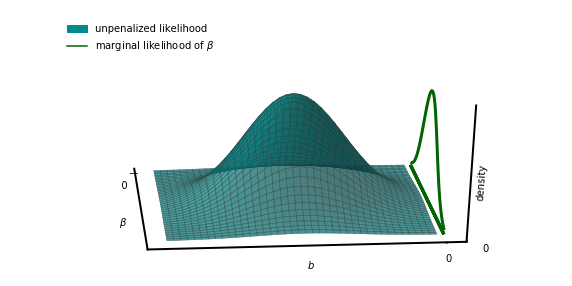

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

delta = 0.05
f = 0.5

X, Y = np.meshgrid(np.arange(0, 2, delta),
                   np.arange(-2, 0, delta))
xy = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

p = stats.multivariate_normal.pdf(xy, mean=[1, -1], cov=(np.eye(2) * 0.28 * f))
Z = p.reshape(len(X), len(X))

ax.plot_surface(X, Y, Z, color='#008C8C', alpha=0.7, linewidth=0.5, antialiased=True,  edgecolor="darkslategray")

# phantom posterior
sigma = 0.3 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='white', linewidth=3, linestyle='--')

# marginal distributions
Zys = np.zeros_like(Z)
Zys[30,:] = Z.max(0)
ax.contour(X, Y, Zys, zdir='y', offset=0, colors='darkgreen', linewidths=3, linestyles='solid')



# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes
ax.xaxis.set_ticklabels(['   0'])
ax.yaxis.set_ticklabels(['0\n\n\n\n'], linespacing=70)
ax.zaxis.set_ticklabels(['0'])
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('           $\\beta$', rotation=0)
ax.set_ylabel('$b$\n')
ax.set_zlabel('density\n', linespacing=8)

# legend
marrs_patch = mpatches.Patch(color='#008C8C', label='unpenalized likelihood')
green_line = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$')
blue_line = mlines.Line2D([], [], color='steelblue',markersize=15, label='marginal likelihood of b')
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='prior of b')
purple_line = mlines.Line2D([], [], color='purple',markersize=15, linestyle='--',label='posterior of b')
#specialwhite = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$', textcolor='white')
white = mlines.Line2D([], [], color='white',markersize=15, linestyle='--',label='')
plt.legend(handles=[marrs_patch, green_line, white, white, white],#, green_line, blue_line, red_line, purple_line], # white
           loc=(0.1,0.65),fancybox=True, framealpha=0)


ax.view_init(azim=-5) #-5, 

plt.savefig('priorispenalty2.pdf', format='pdf', transparent=True, bbox_inches='tight')

plt.show()

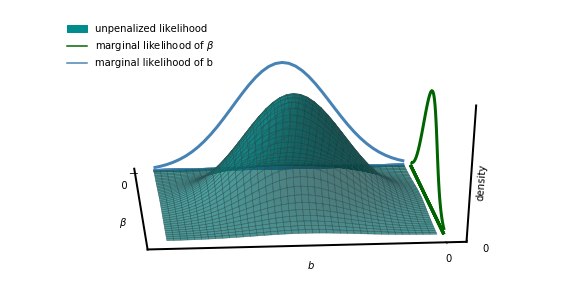

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

delta = 0.05
f = 0.5

X, Y = np.meshgrid(np.arange(0, 2, delta),
                   np.arange(-2, 0, delta))
xy = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

p = stats.multivariate_normal.pdf(xy, mean=[1, -1], cov=(np.eye(2) * 0.28 * f))
Z = p.reshape(len(X), len(X))

ax.plot_surface(X, Y, Z, color='#008C8C', alpha=0.7, linewidth=0.5, antialiased=True,  edgecolor="darkslategray")

# phantom posterior
sigma = 0.3 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='white', linewidth=3, linestyle='--')

# marginal distributions
Zys = np.zeros_like(Z)
Zys[30,:] = Z.max(0)
ax.contour(X, Y, Zys, zdir='y', offset=0, colors='darkgreen', linewidths=3, linestyles='solid')

Zys = np.zeros_like(Z)
Zys[:,30] = Z.max(1)
ax.contour(X, Y, Zys, zdir='x', offset=0, colors='steelblue', linewidths=3, linestyles='solid')




# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes
ax.xaxis.set_ticklabels(['   0'])
ax.yaxis.set_ticklabels(['0\n\n\n\n'], linespacing=70)
ax.zaxis.set_ticklabels(['0'])
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('           $\\beta$', rotation=0)
ax.set_ylabel('$b$\n')
ax.set_zlabel('density\n', linespacing=8)

# legend
marrs_patch = mpatches.Patch(color='#008C8C', label='unpenalized likelihood')
green_line = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$')
blue_line = mlines.Line2D([], [], color='steelblue',markersize=15, label='marginal likelihood of b')
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='prior of b')
purple_line = mlines.Line2D([], [], color='purple',markersize=15, linestyle='--',label='posterior of b')
white = mlines.Line2D([], [], color='white',markersize=15, linestyle='--',label='')
plt.legend(handles=[marrs_patch, green_line, blue_line, white, white],#, green_line, blue_line, red_line, purple_line], # white
           loc=(0.1,0.65),fancybox=True, framealpha=0)


ax.view_init(azim=-5) #-5, -18

plt.savefig('priorispenalty3.pdf', format='pdf', transparent=True, bbox_inches='tight')

plt.show()

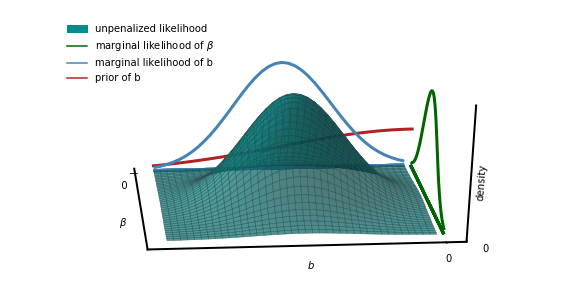

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

delta = 0.05
f = 0.5

X, Y = np.meshgrid(np.arange(0, 2, delta),
                   np.arange(-2, 0, delta))
xy = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

p = stats.multivariate_normal.pdf(xy, mean=[1, -1], cov=(np.eye(2) * 0.28 * f))
Z = p.reshape(len(X), len(X))

ax.plot_surface(X, Y, Z, color='#008C8C', alpha=0.7, linewidth=0.5, antialiased=True,  edgecolor="darkslategray")

# phantom posterior
sigma = 0.3 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='white', linewidth=3, linestyle='--')

# marginal distributions
Zys = np.zeros_like(Z)
Zys[30,:] = Z.max(0)
ax.contour(X, Y, Zys, zdir='y', offset=0, colors='darkgreen', linewidths=3, linestyles='solid')

Zys = np.zeros_like(Z)
Zys[:,30] = Z.max(1)
ax.contour(X, Y, Zys, zdir='x', offset=0, colors='steelblue', linewidths=3, linestyles='solid')


# prior
sigma = 1 #0.5;1
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, 0, sigma)
ax.plot(x, y, zs=0, zdir='x', color='firebrick', linewidth=3)




# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes
ax.xaxis.set_ticklabels(['   0'])
ax.yaxis.set_ticklabels(['0\n\n\n\n'], linespacing=70)
ax.zaxis.set_ticklabels(['0'])
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('           $\\beta$', rotation=0)
ax.set_ylabel('$b$\n')
ax.set_zlabel('density\n', linespacing=8)

# legend
marrs_patch = mpatches.Patch(color='#008C8C', label='unpenalized likelihood')
green_line = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$')
blue_line = mlines.Line2D([], [], color='steelblue',markersize=15, label='marginal likelihood of b')
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='prior of b')
purple_line = mlines.Line2D([], [], color='purple',markersize=15, linestyle='--',label='posterior of b')
white = mlines.Line2D([], [], color='white',markersize=15, linestyle='--',label='')
plt.legend(handles=[marrs_patch, green_line, blue_line, red_line, white],#, green_line, blue_line, red_line, purple_line], # white
           loc=(0.1,0.65),fancybox=True, framealpha=0)


ax.view_init(azim=-5) #-5, -18

plt.savefig('priorispenalty4.pdf', format='pdf', transparent=True, bbox_inches='tight')

plt.show()

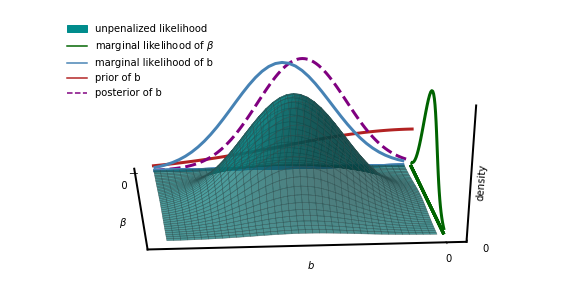

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

delta = 0.05
f = 0.5

X, Y = np.meshgrid(np.arange(0, 2, delta),
                   np.arange(-2, 0, delta))
xy = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

p = stats.multivariate_normal.pdf(xy, mean=[1, -1], cov=(np.eye(2) * 0.28 * f))
Z = p.reshape(len(X), len(X))

ax.plot_surface(X, Y, Z, color='#008C8C', alpha=0.7, linewidth=0.5, antialiased=True,  edgecolor="darkslategray")

# phantom posterior
sigma = 0.3 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='white', linewidth=3, linestyle='--')

# marginal distributions
Zys = np.zeros_like(Z)
Zys[30,:] = Z.max(0)
ax.contour(X, Y, Zys, zdir='y', offset=0, colors='darkgreen', linewidths=3, linestyles='solid')

Zys = np.zeros_like(Z)
Zys[:,30] = Z.max(1)
ax.contour(X, Y, Zys, zdir='x', offset=0, colors='steelblue', linewidths=3, linestyles='solid')


# prior
sigma = 1 #0.5;1
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, 0, sigma)
ax.plot(x, y, zs=0, zdir='x', color='firebrick', linewidth=3)

# posterior
sigma = 0.34 #0.3;0.34
mu = -0.85 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='purple', linewidth=3, linestyle='--')
#ax.text(0, -1, 1.2, 'shrinkage', zdir=(0, 1, 0.2), color='firebrick', fontsize=10, fontweight='bold')




# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes
ax.xaxis.set_ticklabels(['   0'])
ax.yaxis.set_ticklabels(['0\n\n\n\n'], linespacing=70)
ax.zaxis.set_ticklabels(['0'])
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('           $\\beta$', rotation=0)
ax.set_ylabel('$b$\n')
ax.set_zlabel('density\n', linespacing=8)

# legend
marrs_patch = mpatches.Patch(color='#008C8C', label='unpenalized likelihood')
green_line = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$')
blue_line = mlines.Line2D([], [], color='steelblue',markersize=15, label='marginal likelihood of b')
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='prior of b')
purple_line = mlines.Line2D([], [], color='purple',markersize=15, linestyle='--',label='posterior of b')
white = mlines.Line2D([], [], color='white',markersize=15, linestyle='--',label='')
plt.legend(handles=[marrs_patch, green_line, blue_line, red_line, purple_line],#, green_line, blue_line, red_line, purple_line], # white
           loc=(0.1,0.65),fancybox=True, framealpha=0)


ax.view_init(azim=-5) #-5, -18

plt.savefig('priorispenalty5.pdf', format='pdf', transparent=True, bbox_inches='tight')

plt.show()

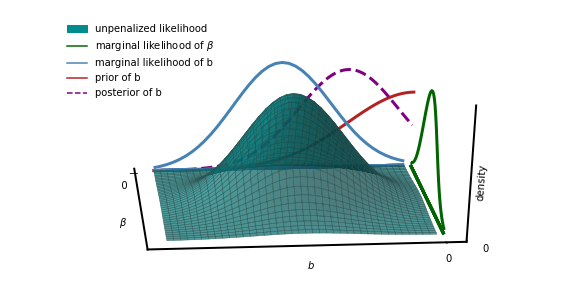

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

delta = 0.05
f = 0.5

X, Y = np.meshgrid(np.arange(0, 2, delta),
                   np.arange(-2, 0, delta))
xy = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))

p = stats.multivariate_normal.pdf(xy, mean=[1, -1], cov=(np.eye(2) * 0.28 * f))
Z = p.reshape(len(X), len(X))

ax.plot_surface(X, Y, Z, color='#008C8C', alpha=0.7, linewidth=0.5, antialiased=True,  edgecolor="darkslategray")

# phantom posterior
sigma = 0.3 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='white', linewidth=3, linestyle='--')

# marginal distributions
Zys = np.zeros_like(Z)
Zys[30,:] = Z.max(0)
ax.contour(X, Y, Zys, zdir='y', offset=0, colors='darkgreen', linewidths=3, linestyles='solid')

Zys = np.zeros_like(Z)
Zys[:,30] = Z.max(1)
ax.contour(X, Y, Zys, zdir='x', offset=0, colors='steelblue', linewidths=3, linestyles='solid')


# prior
sigma = 0.5 #0.5;1
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, 0, sigma)
ax.plot(x, y, zs=0, zdir='x', color='firebrick', linewidth=3)

# posterior
sigma = 0.38 #0.3;0.34
mu = -0.5 #-0.5;-0.85
x = np.linspace(-2, 0, 100)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, zs=0, zdir='x', color='purple', linewidth=3, linestyle='--')
#ax.text(0, -1, 1.2, 'shrinkage', zdir=(0, 1, 0.2), color='firebrick', fontsize=10, fontweight='bold')


# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes
ax.xaxis.set_ticklabels(['   0'])
ax.yaxis.set_ticklabels(['0\n\n\n\n'], linespacing=70)
ax.zaxis.set_ticklabels(['0'])
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([0])

ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('           $\\beta$', rotation=0)
ax.set_ylabel('$b$\n')
ax.set_zlabel('density\n', linespacing=8)

# legend
marrs_patch = mpatches.Patch(color='#008C8C', label='unpenalized likelihood')
green_line = mlines.Line2D([], [], color='darkgreen',markersize=15, label='marginal likelihood of $\\beta$')
blue_line = mlines.Line2D([], [], color='steelblue',markersize=15, label='marginal likelihood of b')
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='prior of b')
purple_line = mlines.Line2D([], [], color='purple',markersize=15, linestyle='--',label='posterior of b')
white = mlines.Line2D([], [], color='white',markersize=15, linestyle='--',label='')
plt.legend(handles=[marrs_patch, green_line, blue_line, red_line, purple_line],#, green_line, blue_line, red_line, purple_line], # white
           loc=(0.1,0.65),fancybox=True, framealpha=0)


ax.view_init(azim=-5) #-5, -18

plt.savefig('priorispenalty6.pdf', format='pdf', transparent=True, bbox_inches='tight')

plt.show()

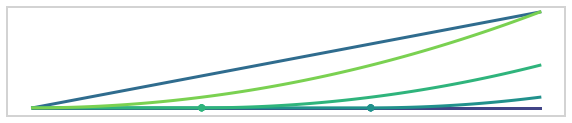

In [12]:
fig, ax = plt.subplots(figsize=(10,2))

x = np.linspace(0., 3., 100)
# Define some coefficients
#b = np.array([2,2,2,2,2,2])
y0 = [0 for i in x]
y1 = [max(0,i)*3 for i in x]
y2 = [max(0,i)**2 for i in x]
y3 = [max(0,(i-1))**2 for i in x]
y4 = [max(0,(i-2))**2 for i in x]

# Plot cyclic cubic regression spline basis functions (colored curves) each multiplied by its coeff
ax = plt.axes()
colors = [plt.cm.viridis(i) for i in np.linspace(0.2, 0.8, 5)]
ax.set_prop_cycle('color', colors)
for y in [y0, y1, y4, y3, y2]:
    plt.plot(x, y, lw=3);
    plt.scatter([1,2], [0,0], color=[colors[3], colors[2]], zorder=10)

plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False,length=0) 
plt.tick_params(axis='y',which='both', left=False, top=False, labelleft=False,length=0)
ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')

plt.savefig('tpb.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
plt.show()

In [13]:
m = [[-1,1,0,0,0,0,0,0,0,0], 
     [1,-2,1,0,0,0,0,0,0,0], 
     [0,1,-2,1,0,0,0,0,0,0], 
     [0,0,1,-2,1,0,0,0,0,0], 
     [0,0,0,1,-2,1,0,0,0,0], 
     [0,0,0,0,1,-2,1,0,0,0], 
     [0,0,0,0,0,1,-2,1,0,0], 
     [0,0,0,0,0,0,1,-2,1,0], 
     [0,0,0,0,0,0,0,1,-2,1],
     [0,0,0,0,0,0,0,0,1,-1]]

m = [[1,-1,0,0],
     [-1,2,-1,0],
     [0,-1,2,-1],
     [0,0,-1,1],
    ]

print(np.array(m).shape)

np.linalg.matrix_rank(m)

(4, 4)


3

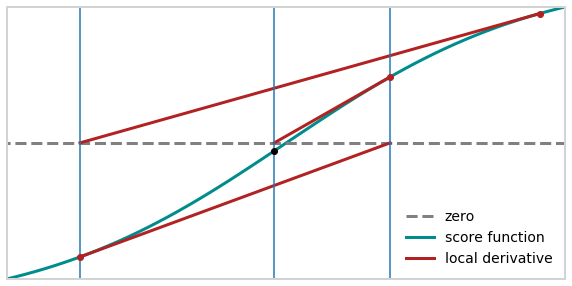

In [14]:
from numpy import tanh, linspace
import matplotlib.pyplot as plt

def Newton_failure(f, dfdx, x):
    f_value = f(x)
    iteration_counter = 0
    while iteration_counter < 3:
        plot_line(f, x, f_value, dfdx(x), iteration_counter)
        x = x - float(f_value)/dfdx(x)
        f_value = f(x)
        iteration_counter += 1
    return x

def f(x):
    return tanh(x)

def dfdx(x):
    return 1 - tanh(x)**2

def plot_line(f, xn, f_xn, slope, i):

    plt.scatter(xn, f_xn, color='firebrick', zorder=10)
    
    plt.savefig('newton_scatter' + str(i) + '.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
    
    
    x_t = linspace(xn-2,xn+2,10000)
    y_t = slope*x_t + (f_xn - slope*xn)  # Straight line: ax + b

    to_plot = [i[0] for i in zip(x_t, y_t) if (i[1]>0 and i[1]<f_xn) or (i[1]<0 and i[1]>f_xn)] 
    y_t = [i for i in y_t if (i>0 and i<f_xn) or (i<0 and i>f_xn)] 
    plt.plot(to_plot, y_t, 'firebrick', lw=3)
    
    plt.savefig('newton_line' + str(i) + '.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
    

    if y_t[0]>0:
        ax.axvline(to_plot[0], ymin=0, ymax=1)
        
    if y_t[0]<0:
        ax.axvline(to_plot[-1], ymin=0, ymax=1)

    plt.savefig('newton_point' + str(i) + '.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
    #plt.show()

fig, ax = plt.subplots(figsize=(10,5))
x_f = linspace(-2,2,100)
y_f = f(x_f)
plt.plot(x_f, y_f, '#008C8C', lw=3)
plt.plot(x_f, [0]*100, ls='--', color='gray', lw=3)
plt.xlim((-1.1,1.1))
plt.ylim((-0.8,0.8))

# legend
marrs_patch = mlines.Line2D([], [], color='#008C8C', markersize=15, label='score function', lw=3)
red_line = mlines.Line2D([], [], color='firebrick',markersize=15, label='local derivative', lw=3)
gray_line = mlines.Line2D([], [], color='gray',markersize=15, linestyle='--',label='zero', lw=3)
plt.legend(handles=[gray_line, marrs_patch, red_line],#, green_line, blue_line, red_line, purple_line], # white
           loc='lower right',fancybox=True, framealpha=0, prop={'size': 14})

plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False,length=0) 
plt.tick_params(axis='y',which='both', left=False, top=False, labelleft=False,length=0)
ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')
#ax.yaxis.set_ticklabels(['0'], fontsize=18)
#ax.set_yticks([0])

plt.savefig('newton.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
    
res = Newton_failure(f, dfdx, x=1)
plt.scatter(res, f(res), color='black', zorder=10)

plt.savefig('newton_finished.pdf', dpi=None, format='pdf', transparent=True, bbox_inches='tight')
